In [116]:
! pip install opencv-contrib-python

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\amar\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)


In [117]:


! pip install scikit-learn




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [118]:
! pip install more-itertools


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [119]:


! pip install scikit-image




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [120]:
! pip install matplotlib
! pip install numpy
! pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\amar\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [121]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [122]:
! pip install rembg[gpu]
! pip install Pillow
from PIL import Image
from rembg import remove

^C
  Using cached onnxruntime_gpu-1.14.1-cp310-cp310-win_amd64.whl (137.0 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\amar\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\onnxruntime\\capi\\onnxruntime_providers_shared.dll'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\amar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [123]:


def show_dataset(images_class, label):
    # show data for 1 class
    plt.figure(figsize=(14,5))
    k = 0
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:,:,::-1])
        except :
            plt.imshow(images_class[k], cmap='RGB')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()



In [159]:
from pathlib import Path

dataset_folder = "dataset/"
direktori_remove="remove_bg/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:10]: 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img_remove = remove(img)

            try:
                os.makedirs(str(direktori_remove)+'/'+str(folder))
            except FileExistsError:
                output_path = direktori_remove +'/'+folder+'/'+str(name)
                cv2.imwrite(output_path,img_remove)
                images.append(img_remove)
                names.append(folder)
                
                

            

In [125]:


labels = np.unique(names)

labels



array(['muammar'], dtype='<U7')

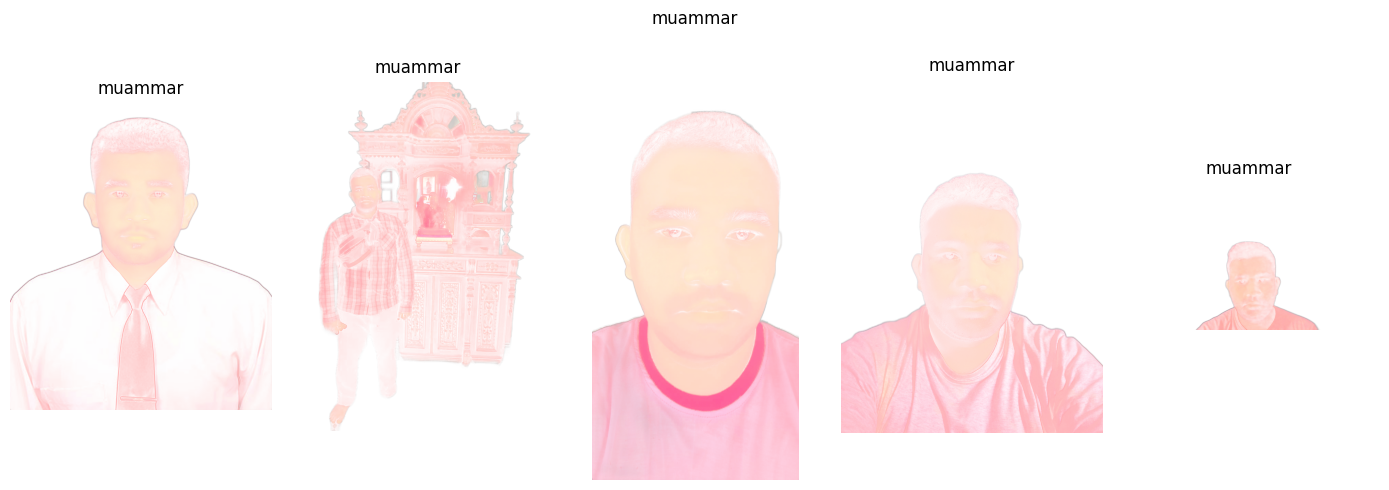

In [126]:


for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)



In [ ]:

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [ ]:


def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w] 
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img



In [ ]:


croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]





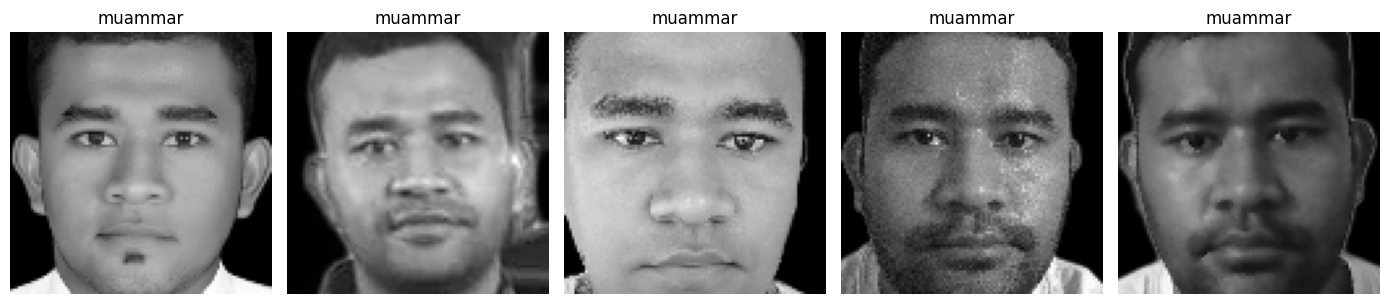

In [ ]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:


le = LabelEncoder()

le.fit(names)

print(le.classes_)



['muammar']


In [ ]:
name_vec = le.transform(names)

In [ ]:


print(name_vec)



[0 0 0 0 0 0 0 0 0 0]


In [ ]:


from sklearn.model_selection import train_test_split



In [ ]:


x_train, x_test, y_train, y_test = train_test_split(np.array(croped_images, dtype=np.float32),   # input data
                                                    np.array(name_vec),                            # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)



In [ ]:


print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)



(7, 100, 100) (7,) (3, 100, 100) (3,)


In [ ]:


from skimage.feature import local_binary_pattern



In [ ]:


P = 8
R = 1
img = x_train[0]
lbp_img = local_binary_pattern(img, P=P, R=R, method="default")



C:\Users\amar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


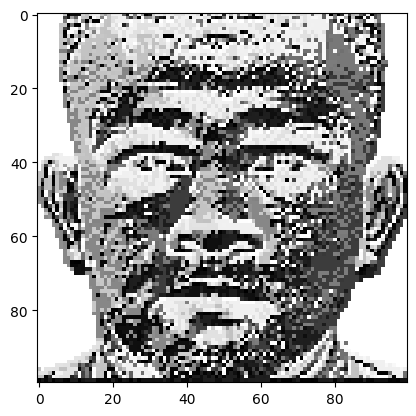

In [ ]:
plt.imshow(lbp_img, cmap="gray")

In [ ]:


H = np.histogram(lbp_img.ravel(),                          
                 bins=2**P,                          
                 range=(0, 2**P),
                 density=True)[0] 



In [ ]:


print(H)



[3.690e-02 9.900e-03 2.000e-03 5.700e-03 9.000e-03 2.300e-03 5.500e-03
 1.880e-02 1.700e-03 4.000e-04 1.000e-04 2.000e-04 4.500e-03 9.000e-04
 1.080e-02 2.310e-02 1.010e-02 2.800e-03 2.000e-04 1.000e-03 1.500e-03
 5.000e-04 3.000e-04 1.000e-03 5.600e-03 5.000e-04 7.000e-04 3.000e-04
 1.730e-02 1.200e-03 1.940e-02 2.080e-02 2.300e-03 3.000e-04 0.000e+00
 2.000e-04 2.000e-04 1.000e-04 2.000e-04 2.000e-04 3.000e-04 0.000e+00
 0.000e+00 0.000e+00 9.000e-04 0.000e+00 3.000e-04 5.000e-04 4.800e-03
 7.000e-04 0.000e+00 3.000e-04 9.000e-04 0.000e+00 1.000e-04 3.000e-04
 1.160e-02 4.000e-04 1.000e-04 1.000e-04 4.450e-02 8.000e-04 1.040e-02
 7.700e-03 8.200e-03 1.200e-03 2.000e-04 1.000e-03 1.600e-03 1.000e-04
 1.000e-04 7.000e-04 3.000e-04 0.000e+00 1.000e-04 3.000e-04 1.200e-03
 2.000e-04 3.000e-04 9.000e-04 8.000e-04 1.000e-04 2.000e-04 1.000e-04
 2.000e-04 0.000e+00 1.000e-04 3.000e-04 8.000e-04 1.000e-04 0.000e+00
 1.000e-04 1.100e-03 2.000e-04 1.200e-03 8.000e-04 6.100e-03 5.000e-04
 1.000

<function matplotlib.pyplot.show(close=None, block=None)>

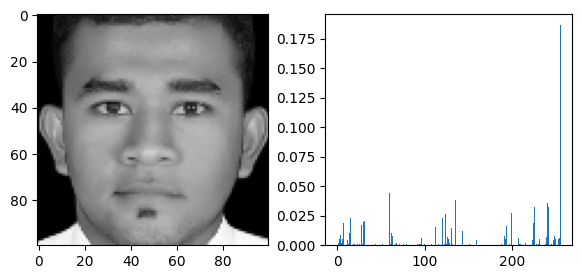

In [ ]:


plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
axis = np.arange(len(H))
plt.bar(axis, H)

plt.show



In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
class LBPHFaceRecognizer_custom():
    #
    # ----- class for LBPH + Nearest Neighbours (chi 2) ------
    #
    def __init__(self):
        self.neigh = NearestNeighbors(n_neighbors=1, radius=0.4, metric=self.chi2_distance)
        self.face_histograms = []
        self.y = []
    
    def chi2_distance(self, hist1, hist2, gamma=0.5): 
        chi = gamma * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-7))
        return chi
    
    def find_lbp_histogram(self, image, P=8, R=1, eps=1e-7, n_window=(8,8)):
        E = []
        h, w = image.shape
        h_sz = int(np.floor(h/n_window[0]))
        w_sz = int(np.floor(w/n_window[1]))
        lbp_img = local_binary_pattern(image, P=P, R=R, method="default")
        for (x, y, C) in self.sliding_window(lbp_img, stride=(h_sz, w_sz), window=(h_sz, w_sz)):
            if C.shape[0] != h_sz or C.shape[1] != w_sz:
                continue
            H = np.histogram(C,                          
                             bins=2**P, 
                             range=(0, 2**P),
                             density=True)[0] 
            
            H = H.astype("float")
            H /= (H.sum() + eps)
            E.extend(H)
        return E
    
    def sliding_window(self, image, stride, window):
        for y in range(0, image.shape[0], stride[0]):
            for x in range(0, image.shape[1], stride[1]):
                yield (x, y, image[y:y + window[1], x:x + window[0]])
                   
    def train(self, x, y):
        self.y = y
        self.face_histograms = [self.find_lbp_histogram(img) for img in x]
        self.neigh.fit(self.face_histograms)
    
    def predict(self, x):
        hists = [self.find_lbp_histogram(img) for img in x]
        dist, idx = self.neigh.kneighbors(hists)
        pred_id = np.array([self.y[i[0]] for i in idx])
        return pred_id, dist[0]

In [ ]:
model_lbph_custom = LBPHFaceRecognizer_custom()

In [ ]:
model_lbph_custom.train(x_train, y_train)

C:\Users\amar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:


y_predict = model_lbph_custom.predict(x_test)[0]



C:\Users\amar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

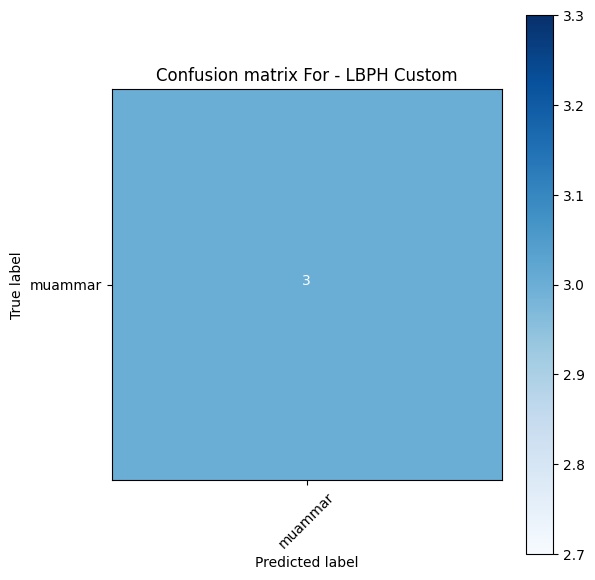

In [ ]:


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For - LBPH Custom')



In [ ]:
print("== Classification Report for - LBPH Custom ==\n")
print(classification_report(y_test, 
                            y_predict, 
                            ))

== Classification Report for - LBPH Custom ==

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
model = cv2.face.LBPHFaceRecognizer_create()

AttributeError: module 'cv2' has no attribute 'face'

In [ ]:


model.train(croped_images, name_vec)



NameError: name 'model' is not defined

In [ ]:


model.save("lbph_model.yml")



In [ ]:


model.read("lbph_model.yml")



In [ ]:


test_folder = "test/"
actual_names = []
predicted_names = []
confidences = []
for filename in os.listdir(test_folder):
    if filename.find(".jpg") > -1:
        path = os.path.join(test_folder, filename)
        
        imgx = cv2.imread(path)
        imgy = detect_face(imgx, 0)
        gray = cv2.cvtColor(imgx, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
        faces_detected = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        for (x, y, w, h) in faces_detected:
            cv2.rectangle(img, pt1=(x, y), pt2=(x + w, y + h), color=(255, 0, 0), thickness=2)
            Id,pred = model.predict(gray[y:y + h, x:x + w])
    
            confidence = int(100*(1-pred/300))
      
        
            actual_names.append(filename)
            predicted_names.append(Id)
            confidences.append(confidence)
        
            print("Actual \t: ", filename)
            print("Predic \t: ", labels[Id])
            print("Confidence \t: ",confidence)
            

        plt.figure()
        plt.imshow(imgy, cmap="gray")
        plt.axis(False)
        plt.show()



NameError: name 'model' is not defined

In [ ]:


from sklearn.metrics import confusion_matrix


import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

(262, 100, 100) (262,) (88, 100, 100) (88,)


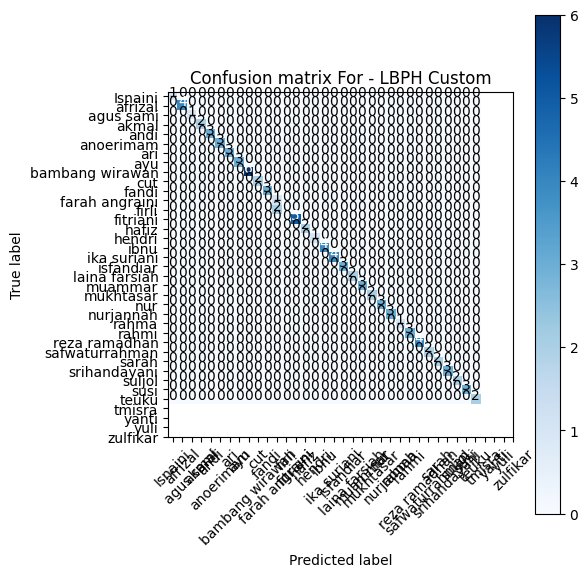

In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(croped_images, dtype=np.float32),   # input data
                                                    np.array(name_vec),                            # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)




# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For - LBPH Custom')





In [ ]:
from sklearn.metrics import classification_report

print("== Classification Report for Test Dataset ==\n")
print(classification_report(y_test, 
                            y_predict, 
                            target_names=None
                            ))


== Classification Report for Test Dataset ==

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.33      1.00      0.50         1
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          18       1.00      1.00  

C:\Users\amar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: Undefin